In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List


In [3]:
dataPath = Path.cwd().parents[1] / 'data'
proteinHighH = dataPath / 'calibratedModel' / 'highH'
proteinLowH = dataPath / 'calibratedModel' / 'lowH'
proteinStudentsH = dataPath / 'calibratedModel' / 'studentsH'
susmanPathScaling = dataPath / 'realData' / 'Susman' / \
    'longLineages'
bayesianPath = '/Users/tommaso/Desktop/masterThesis/data/bayesianInference/'

susmanBayesian = pd.read_csv(bayesianPath + 'susman18_export_run_635409.csv')

In [4]:
def plotCorrelationMeanSize(paths: Path, titles: List[str], suffix: str = '') -> None:
    fig, ax_ = plt.subplots(2, 2, figsize=(15, 12))
    for ax, path, title in zip(ax_.flatten(), paths, titles):

        parametersPath: Path = path / f'correlationParameters{suffix}.csv'
        correlationLenghts: pd.Series = pd.read_csv(parametersPath)[
            'correlation']
        allMeans: np.ndarray = np.load(
            path / 'momentScaling' / f'allMeans{suffix}.npy')

        ax.scatter(allMeans[0, :], correlationLenghts, edgecolor='black')
        ax.set_xlabel('$<m>$', fontsize=15)
        ax.set_ylabel('$\\xi$', fontsize=15)
        ax.set_title(title, fontsize=18)

    fig.tight_layout()

    return fig, ax_

In [5]:
def plotMomentScaling(sizesPaths: Path, titles: List[str], maxK: int = 3, suffix: str = '') -> None:
    assert maxK <= 5, "Maximum k available is 5"
    assert isinstance(maxK, int), 'available data is in int format'

    allMeans = [
        np.load(sizesPath / f'allMeans{suffix}.npy') for sizesPath in sizesPaths]
    allMoments = [
        np.load(sizesPath / f'allMoments{suffix}.npy') for sizesPath in sizesPaths]

    fig, ax_ = plt.subplots(2, 2, figsize=(15, 12))

    for ax, mean, moment, title in zip(ax_.flatten(), allMeans, allMoments, titles):

        for i, k in enumerate(range(2, maxK + 1)):
            ax.scatter(mean[i], moment[i],
                       label=f'k={k}', edgecolor='black')

        ax.set_xlabel('$<m>$', fontsize=15)
        ax.set_ylabel(f'$\\xi$', fontsize=15)
        ax.set_title(title, fontsize=18)
        ax.legend(facecolor='aliceblue', shadow=True, edgecolor='black')

    fig.tight_layout()

    return fig, ax

## Comparison Between Calibrated Model

Down below there is a small comparison between the calibrated models. Only the Stawsky data is reported as that is what my group and the master thesis worked on.
We worked only on 1 lineage (lineage $15$) while the csv data has multiple lineages even though 15 is missing.
Results from my group and the master thesis more or less agree, especially on the gamma value and, while the csv data suggest we are in the absorbing state (and by a good margin), our results point instead to the active state, $\gamma \approx 0.9$


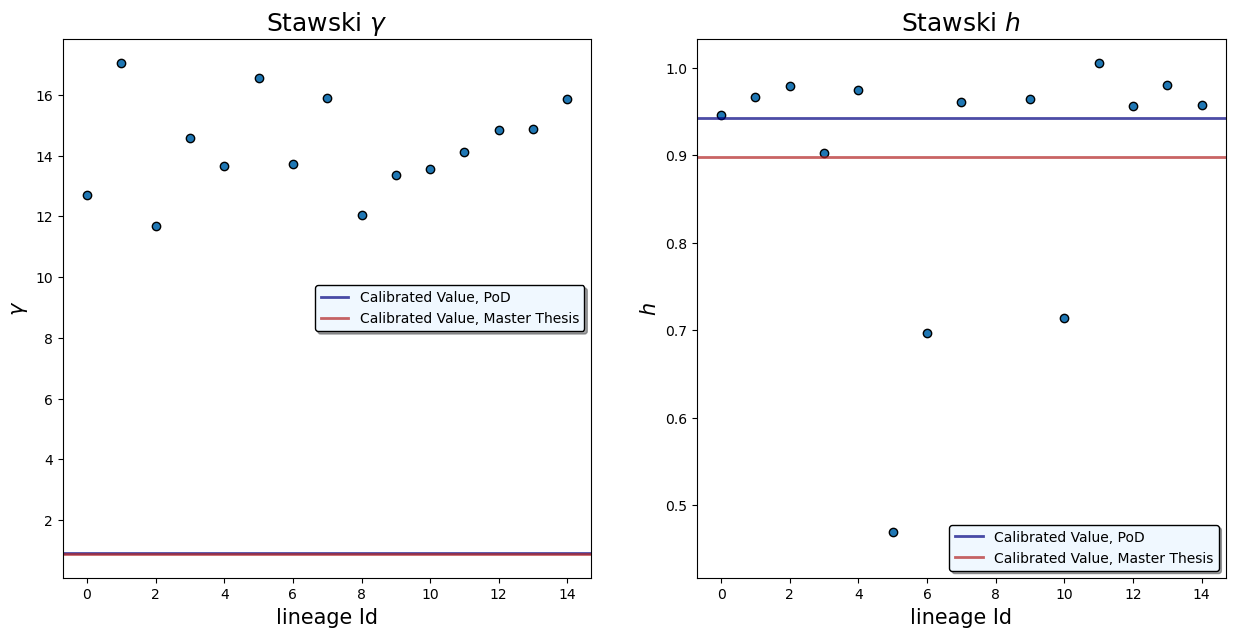

In [6]:
alphaMt = (1.4362**2) / (0.0653**2)
betaMt = alphaMt / 1.4362
PoD = {'gamma': 1.2268 / ((30.4743 - 1) * 0.0458), 'h': 0.5455/0.5787}
MT = {'gamma': 1.2772 / ((alphaMt - 1) / (betaMt)), 'h': 0.5241 / 0.5835}
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax1, ax2 = ax.flatten()
ax1.scatter(range(len(susmanBayesian)), susmanBayesian['w2'] /
            (((susmanBayesian['c'] - 1) / susmanBayesian['d'])), edgecolor='black')
ax1.axhline(PoD['gamma'], color='navy', linewidth=2,
            alpha=0.7, label='Calibrated Value, PoD')
ax1.axhline(MT['gamma'], color='firebrick', linewidth=2,
            alpha=0.7, label='Calibrated Value, Master Thesis')
ax1.set_xlabel('lineage Id', fontsize=15)
ax1.set_ylabel('$\\gamma$', fontsize=15)
ax1.set_title('Stawski $\\gamma$', fontsize=18)

ax2.scatter(range(len(susmanBayesian)),
            susmanBayesian['u'] / susmanBayesian['v'], edgecolor='black')
ax2.axhline(PoD['h'], color='navy', linewidth=2,
            alpha=0.7, label='Calibrated Value, PoD')
ax2.axhline(MT['h'], color='firebrick', linewidth=2,
            alpha=0.7, label='Calibrated Value, Master Thesis')
ax2.set_xlabel('lineage Id', fontsize=15)
ax2.set_ylabel('$h$', fontsize=15)
ax2.set_title('Stawski $h$', fontsize=18)
ax1.legend(facecolor='aliceblue', edgecolor='black',
           shadow=True, loc='center right')
_ = ax2.legend(facecolor='aliceblue', edgecolor='black',
               shadow=True, loc='lower right')

## Simulations

Below are instead some plots and tables summing up simulation results:
The $\gamma$ value is first set to the one on which both my group and the master thesis results agree on ($\approx 0.9$). The $h$ values first span the vicinity of the $h$ value of the calibrated models ($h \approx 0.9$).\
In this setting the power law exponents closely resemble the data values while the mean size at birth differ.\
Looking at the master thesis, the model is calibrated also on synthetic data yielding the same $\gamma$ but a lower $h$. Simulating at this new $h$ value we get the right mean size at birth with slightly worse power law exponents.\
\
The last plots represent the parameters the this year's students got (taking an approximate mean of the different lineages), here we have trivial moment scaling.
\
\
The behaviour of $\xi$ seems still linear even if it looks noisier than the simulations done closer to the critical point.


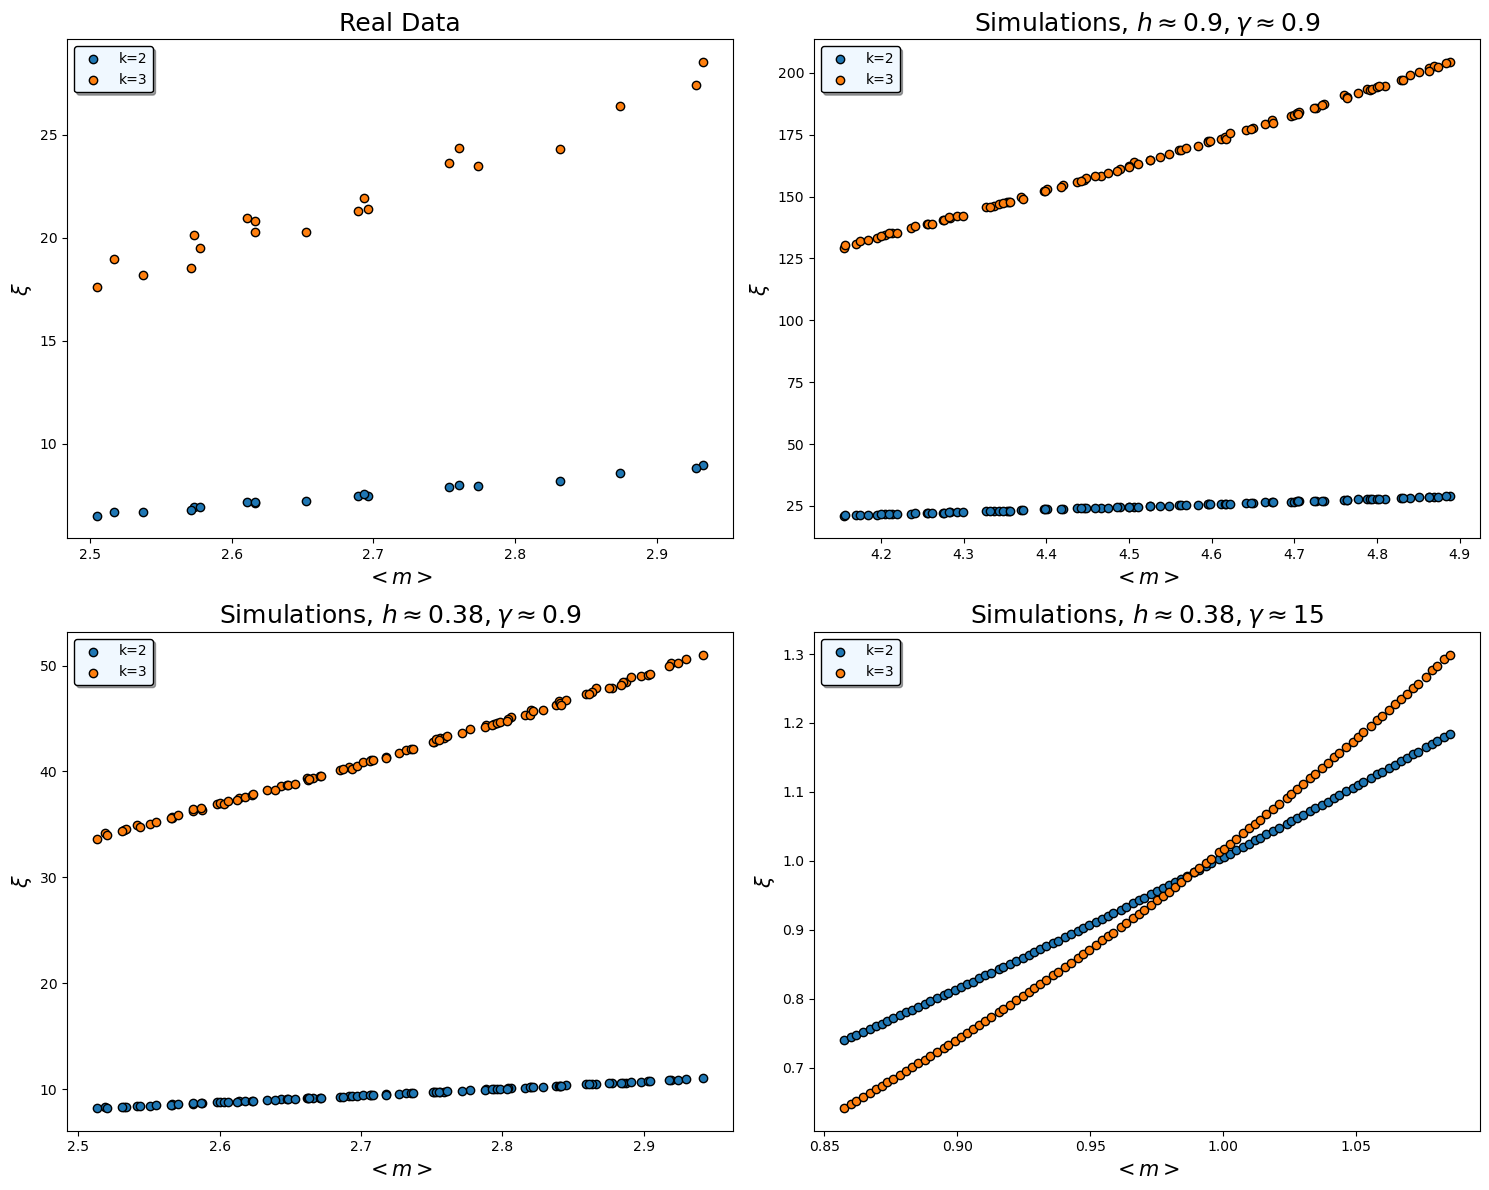

In [7]:
titles = ['Real Data', 'Simulations, $h \\approx 0.9, \\gamma \\approx 0.9$',
          'Simulations, $h \\approx 0.38, \\gamma \\approx 0.9$',  'Simulations, $h \\approx 0.38, \\gamma \\approx 15$']
_ = plotMomentScaling([susmanPathScaling / 'momentScaling', proteinHighH / 'momentScaling',
                      proteinLowH / 'momentScaling', proteinStudentsH / 'momentScaling'], titles=titles)

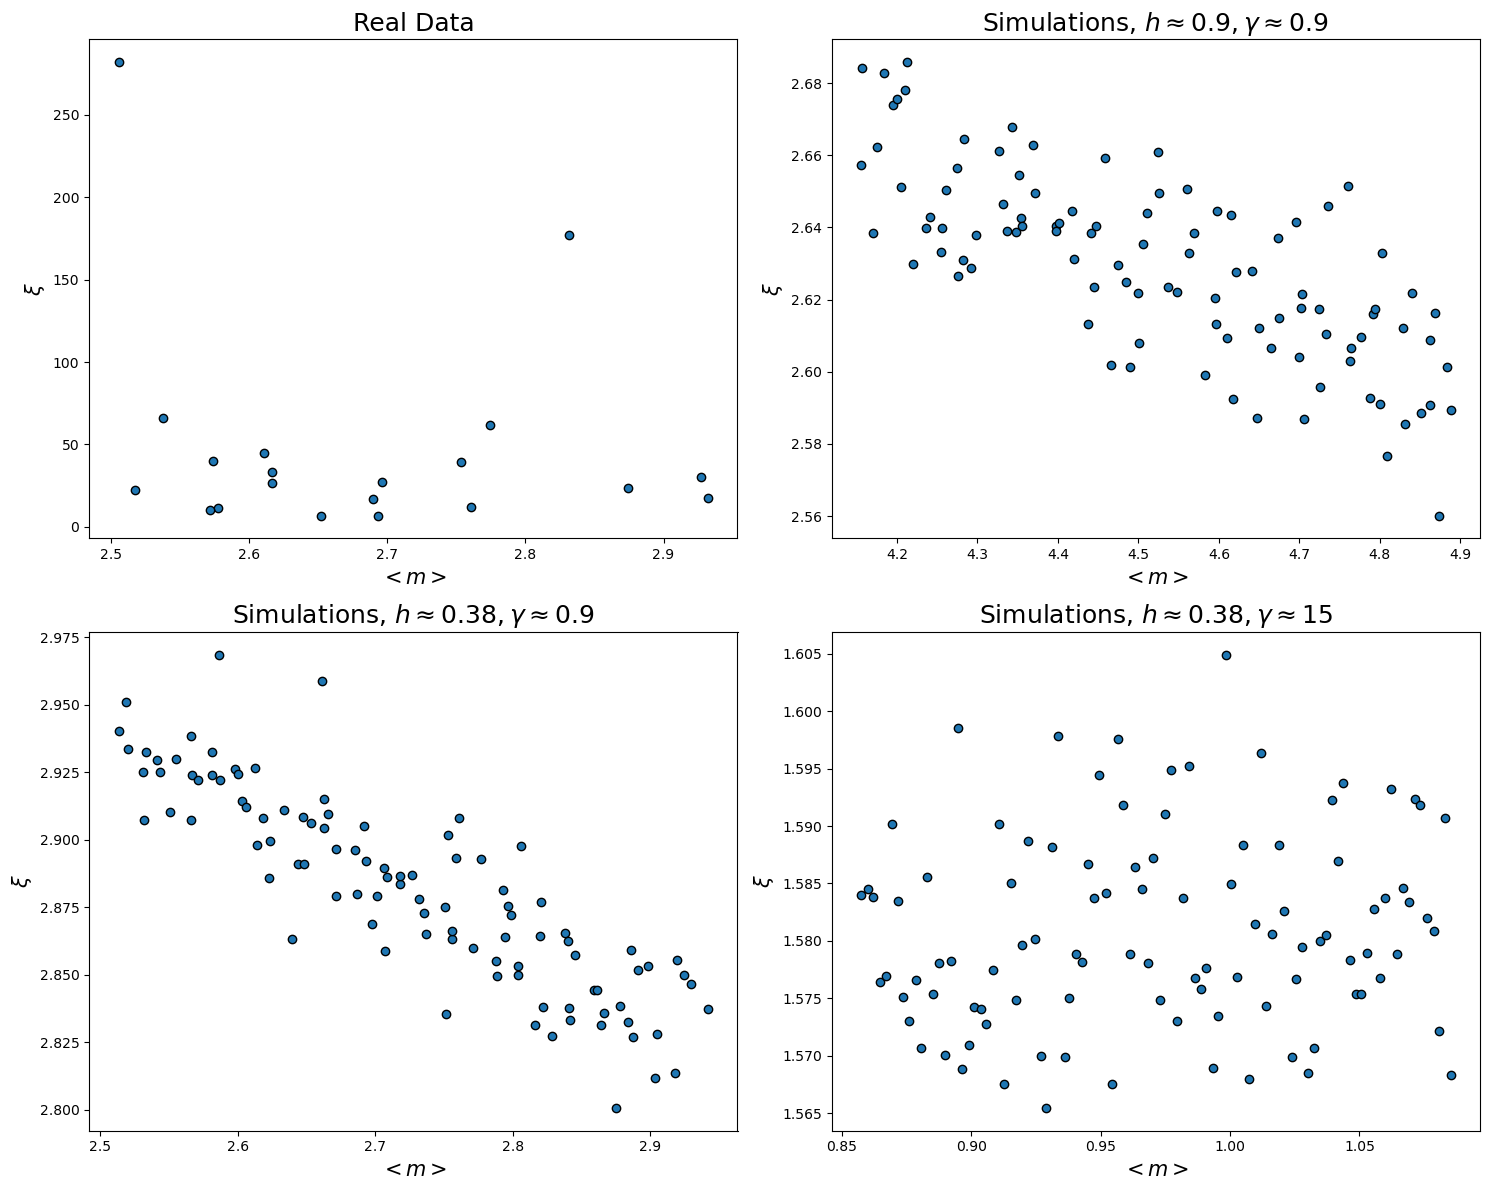

In [8]:
_ = plotCorrelationMeanSize(
    [susmanPathScaling, proteinHighH, proteinLowH, proteinStudentsH], titles=titles)

<center>

## Table Summing up Calibration

</center>


<center>

|                                         |    **γ**     |     **h**     |
| --------------------------------------- | :----------: | :-----------: |
| **Master Thesis, Real Data**            |    0.891     |     0.898     |
| **Master Thesis, Synthetic Data**       |    0.891     |     0.388     |
| **PoD, Real Data**                      |    0.909     |     0.943     |
| **This year's PoD students, Real Data** | $\approx 15$ | $\approx 0.9$ |

</center>


<center>

## Table Summing up Power Law Exponents

</center>


<center>

|                                           | **Power Law Exponent, k = 2** | **Power Law Exponent, k = 3** |
| ----------------------------------------- | :---------------------------: | :---------------------------: |
| **$h \approx 0.38$ $\gamma \approx 0.9$** |             1.853             |             2.609             |
| **$h \approx 0.9$ $\gamma \approx 0.9$**  |             1.923             |             2.787             |
| **$h \approx 0.9$ $\gamma \approx 15$**   |               2               |               3               |
| **Data**                                  |             1.936             |             2.755             |

</center>
